# Feed Forward Neural Networks

In this notebook, you will learn to work with simple feed forward neural networks (FFNNs).

![title](assets/feed_forward_NN.jpg)

### Case: automatic mail-delivery

One of the precursors to more advanced networks and tasks is to consider the recognition of handwriting. More specifically, can you train a network to distinguish the digits 0-9? This was one of the earliest practical applications for neural networks, and we will go through it here.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
cm = plt.cm.gray_r

In [18]:
data = datasets.load_digits() 
X = data.images
y = data.target

#### Ex.1: How many images do we have?

#### First we visualize our data

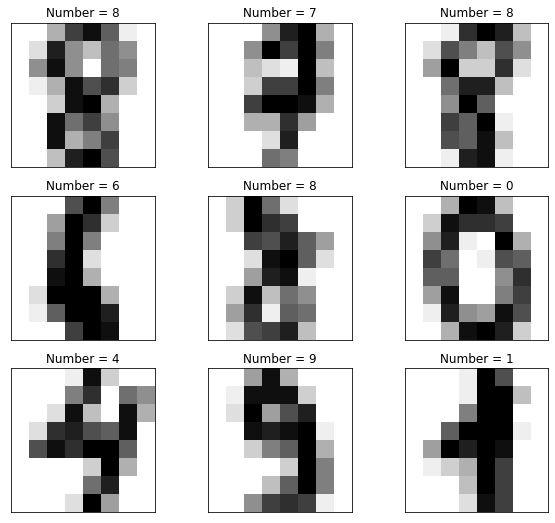

In [33]:
fig = plt.figure(figsize=(10,9))

for i in range(9):
    
    ax = fig.add_subplot(3,3,i+1)
    i = np.random.randint(0,X.shape[0])
    img = X[i]
    plt.imshow(img, cmap=cm)
    plt.xticks([]); plt.yticks([])
    plt.title(f'Number = {y[i]}')

The resolution here is kept very low as it requires less data resources to work with.

Currently each image is organized into a 8x8 grid. However, the neurons are not aranged spacially in a grid, so we have to 'unroll' the images into a single dimension to match the input layer. This can be achieved using the `reshape` method:

In [40]:
X = X.reshape(1797, 64)
X.shape

(1797, 64)

#### Before training the network, we need to split the data into a training set and a test set. 
It is very important to not evaluate a model on an independent data set (we will see why later). The split is done using `sklearn`'s `train_test_split`.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Creating a machine learning model. 

The convention in python is to treat the model as an object (an instance of a *class*. A class is just a template  of predefined methods used to create an object). 

In [42]:
clf = MLPClassifier(hidden_layer_sizes=(50,50))

When we create the object, we also specify the network architecture (and other *hyperparameters*). This expample has 2 hidden layers, 50 neurons in each layer. Most of the hyperparameters have a behind the scenes default setting. We say that `clf` is an instance of the the object, MLPClassifier. We can check this with the `type` command.

#### Ex.2: What class is `clf` an instance of?

Each machine learning model in scikit-learn has a set of associated methods. The most important ones are `fit` and `predict`. The `fit` method is what actually trains the model. Once trained, `clf.predit()` can be called to make predictions on unseen samples. 

In [48]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### Now that the model has been trained, we can try to make a prediction on a few unseen samples. You are encouraged to rerun this very code a few times and confirm that the network indeed has been properly trained with a high accuracy!

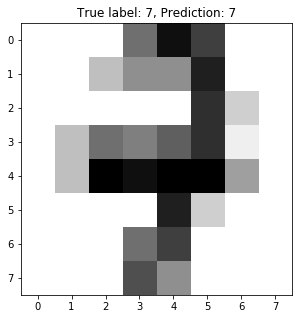

In [51]:
i = np.random.randint(0,10)
img = X_test[i].reshape(8,8) #we need to redo the flatten operation 
pred = clf.predict([X_test[i]])[0]

plt.figure(figsize=(5,5))
plt.imshow(img, cmap=cm)
plt.title(f'True label: {y_test[i]}, Prediction: {pred}')
plt.show()

#### Notice that we make the predictions on `X_test` and not `X_train`.

To get a more proper quantification of the model, we can compute the accuracy: the relationship between the correct predictions and the total number of predictions:

$$ Accuracy = \frac{TP}{TP + FP}$$

In [135]:
accuracy = clf.score(X_test, y_test)

print(f'The model has a test accuracy of {round(accuracy,2)} and a train accuracy of {clf.score(X_train,y_train)}')

The model has a test accuracy of 0.97 and a train accuracy of 1.0


As you can see, the train accuracy is overly optimistic, with a perfect prediction score - this is known as overfitting - the model memorizes specific instances at the cost of generlization. However, this degree of overfitting seen here is not very severe. 

#### Summary so far: with only about 2 lines of code, you can make a neural net, train it on a dataset, and evaluate its performance